<a href="https://colab.research.google.com/github/eunsour/Deep-Learning-from-Scratch/blob/main/Chapter%2003/Ch3_Neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 퍼셉트론은 복잡한 함수도 표현할 수 있다. 컴퓨터가 수행하는 복잡한 처리도 퍼셉트론으로 (이론상) 표현할 수 있음.
2. 그러나, 가중치를 설정하는 작업 (원하는 결과를 출력하도록 가중치 값을 적절히 정하는 작업)은 여전히 사람이 수동으로 한다.
3. 신경망은 이러한 문제를 해결해 준다. 신경망의 중요한 성질 중 하나는 가중치 매개변수의 적절한 값을 데이터로부터 자동으로 학습하는 능력이다.

# 3.1 퍼셉트론에서 신경망으로

## 3.1.1 신경망의 예
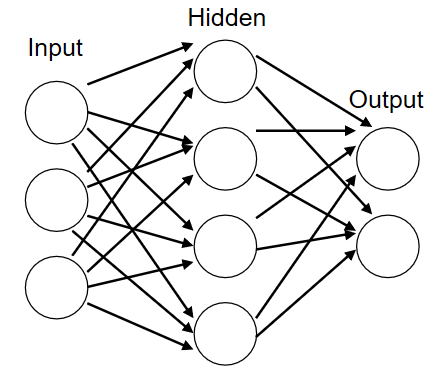


## 3.1.3 활성화 함수의 등장
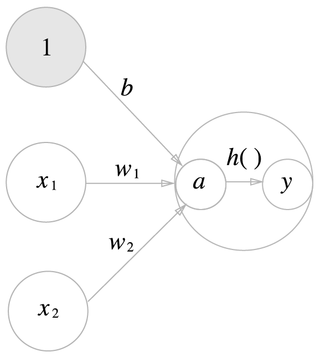
1. 입력 신호의 총합을 출력 신호로 변환하는 함수를 일반적으로 **활성화 함수**라 한다.
2. 가중치가 달린 입력 신호와 편향의 총합을 계산하고, 이를 a라 한다. 그리고 a를 함수 h()에 넣어 y를 출력하는 흐름이다.


# 3.2 활성화 함수
- 활성화 함수는 임계값을 경계로 출력이 바뀌는데, 이런 함수를 계단 함수라 한다.
- 활성화 함수를 계단 함수에서 다른 함수르 변경하는 것이 신경망의 세계로 나아가는 열쇠이다.

## 3.2.1 시그모이드 함수
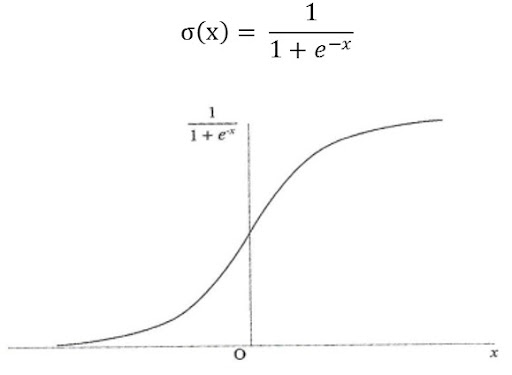
- e는 자연상수로 2.7182..의 값을 갖는 실수이다.
- 신경망에서는 활성화 함수로 시그모이드 함수를 이용하여 신호를 변환하고, 그 변환된 신호를 다음 뉴런에 전달한다.
- 그러면 활성화 함수로 이용되는 시그모이드 함수를 계단 함수와 비교하면서 살펴본다.

## 3.2.2 계단 함수 구현하기


- 이 구현은 단순하고 쉽지만, 인수 x는 실수(부동소수점)만 받아들인다. 즉, 넘파이 배열을 인수로 넣을 수 없다.

In [3]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

In [4]:
def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [5]:
import numpy as np
x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

- 넘파이 배열에 부등호 연산을 수행하면 배열의 원소 각각에 부등호 연산을 수행한 bool 배열이 생성된다.

In [6]:
y = x > 0
y

array([False,  True,  True])

In [7]:
y = y.astype(np.int) # 넘파이 배열의 자료형 변환
y

array([0, 1, 1])

## 3.2.3 계단 함수의 그래프

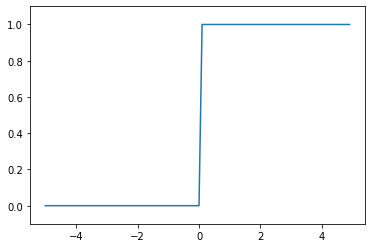

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)  # y축의 범위 지정
plt.show()

## 3.2.4 시그모이드 함수 구현하기

In [9]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [10]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

- 브로드캐스트란 넘파이 배열과 스칼라값의 연산을 넘파이 배열의 원소 각각과 스칼라 값의 연산으로 바꿔 수행하는 것이다.

In [11]:
t = np.array([1.0, 2.0, 3.0])
1.0 + t

array([2., 3., 4.])

In [12]:
1.0 / t

array([1.        , 0.5       , 0.33333333])

- 시그모이드 함수를 그래프로 그려본다

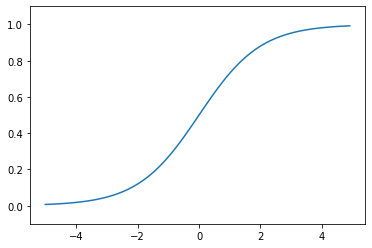

In [13]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

## 3.2.5 시그모이드 함수와 계단 함수 비교
- 시그모이드 함수는 부드러운 곡선이며 입력에 따라 출력이 연속적으로 변화한다. 한편, 계단 함수는 0을 경계로 출력이 갑자기 바뀌어버린다. 
- 시그모이드 함수의 이 매끈함이 신경망 학습에서 아주 중요한 역할을 하게 된다.



## 3.2.6 비선형 함수
- 계단 함수와 시그모이드 함수는 모두 비선형 함수이다.
- 시그모이드 함수는 곡선, 계단 함수는 계단처럼 구부러진 직선으로 나타나며, 동시에 **비선형 함수**로 분류된다.
- 비선형 함수는 문자 그대로 '선형이 아닌' 함수이다. 즉, 직선 1개로는 그릴 수 없는 함수를 말한다.
- 신경망에서는 활성화 함수로 비선형 함수를 사용해야 한다. (선형 함수를 사용하면 신경망의 층을 깊게하는 의미가 없어진다.) 

- 선형 함수의 문제는 층을 아무리 깊게 해도 '은닉층이 없는 네트워크'로도 똑같은 기능을 할 수 있다는 데 있다.
- 선형 함수인 h(x) = cx를 식으로 나타내면 y(x) = h(h(h(x)))가 된다. 이 계산은 y(x) = c * c * c * x처럼 곱셈을 세 번 수행하지만, 실은 y(x0 = ax와 똑같은 식이다. 
- 위의 예처럼 선형 함수를 이용해서는 여러 층으로 구성하는 이점을 살릴 수 없다. 
- 그래서 층을 쌓는 혜택을 얻고 싶다면 활성화 함수로는 반드시 비선형 함수를 사용해야 한다. 

## 3.2.7 ReLU(Rectified Linear Unit) 함수
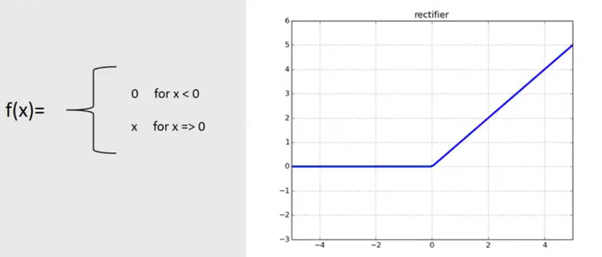
- ReLU는 입력이 0을 넘으면 그 입력을 그대로 출력하고, 0 이하이면 0을 출력하는 함수이다.

In [14]:
# ReLU는 간단한 함수라서 다음과 같이 쉽게 구현할 수 있다.
def relu(x):
    return np.maximum(0, x)

# 3.3 다차원 배열의 계산
- 넘파이의 다차원 배열을 사용한 계산법을 숙달하면 신경망을 효율적으로 구현할 수 있다.

## 3.3.1 다차원 배열


In [15]:
# 1차원 배열
import numpy as np
A = np.array([1, 2, 3, 4])
print(A)

[1 2 3 4]


In [16]:
np.ndim(A) # 배열의 차원 수 확인

1

In [17]:
A.shape

(4,)

In [18]:
A.shape[0]

4

In [19]:
# 2차원 배열
B = np.array([[1, 2], [3, 4], [5, 6]])
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [20]:
np.ndim(B)

2

In [21]:
B.shape

(3, 2)

## 3.3.2 행렬의 곱


In [22]:
A = np.array([[1, 2], [3, 4]])
A.shape

(2, 2)

In [23]:
B = np.array([[5, 6], [7, 8]])
B.shape

(2, 2)

- 두 행렬의 곱은 넘파이 함수 np.dot()으로 계산한다.
- np.dot()은 입력이 1차원 배열이면 벡터를, 2차원 배열이면 행렬 곱을 계산한다.

In [24]:
np.dot(A, B)

array([[19, 22],
       [43, 50]])

In [25]:
## 2X3 행렬 A와 3X2 행렬 B의 곱
A = np.array([[1,2,3], [4,5,6]])
B = np.array([[1,2], [3,4], [5,6]])
C = np.array([[1, 2], [3, 4]])
C.shape

(2, 2)

In [26]:
A.shape

(2, 3)

다차원 배열을 곱하려면 두 행렬의 대응하는 차원의 원소 수를 일치시켜야 한다.

In [27]:
np.dot(A, C)

ValueError: ignored

In [28]:
A = np.array([[1,2], [3, 4], [5, 6]])
A.shape

(3, 2)

In [29]:
B = np.array([7,8])
B.shape

(2,)

In [30]:
np.dot(A, B)

array([23, 53, 83])

## 3.3.3 신경망에서의 행렬 곱

In [31]:
X = np.array([1, 2])
X.shape

(2,)

In [32]:
W = np.array([[1, 3, 5], [2, 4, 6]])
print(W)

[[1 3 5]
 [2 4 6]]


In [33]:
W.shape

(2, 3)

In [34]:
Y = np.dot(X, W)
print(Y)

[ 5 11 17]


# 3.4 3층 신경망 구현하기
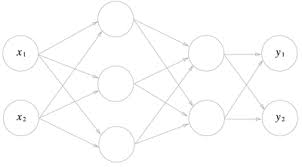
- 입력층(0층)은 2개, 첫 번째 은닉층(1층)은 3개, 두 번째 은닉층(2층)은 2개, 출력층(3층)은 2개의 뉴런으로 구성된다.

## 3.4.2 각 층의 신호 전달 구현하기
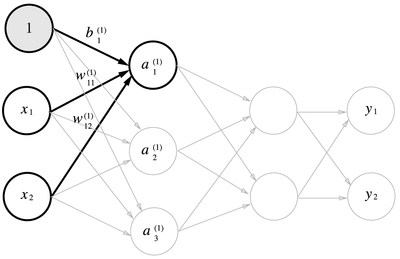

In [35]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape) 
print(X.shape) 
print(B1.shape)

A1 = np.dot(X, W1) + B1

(2, 3)
(2,)
(3,)


In [37]:
Z1 = sigmoid(A1)

print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


1층에서 2층으로의 신호 전달

In [38]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape) 
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

(3,)
(3, 2)
(2,)


2층에서 출력층으로의 신호 전달

In [39]:
def identify_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identify_function(A3) # 혹은 Y = A3

## 3.4.3 구현 정리

In [40]:
def init_network(): # 가중치와 편향을 초기화하고 이들을 network에 저장한다.
    network = {}    # 각 층에 필요한 매개변수(가중치와 편향)를 저장한다.
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network

def forward(network, x):  # 입력 신호를 출력으로 변환하는 처리 과정
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identify_function(a3)

    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


# 3.5 출력층 설계하기
- 신경망은 분류와 회귀 모두에 이용할 수 있다.
- 다만 둘 중 어떤 문제냐에 따라 출력층에서 사용하는 활성화 함수가 달라진다.
- 일반적으로 회귀에는 항등 함수를, 분류에는 소프트맥스 함수를 사용한다.

## 3.5.1 항등 함수와 소프트맥스 함수 구현하기
- 항등 함수는 입력을 그대로 출력한다. 
- 한편, 분류에서 사용하는 **소프트맥스 함수**의 식은 다음과 같다.
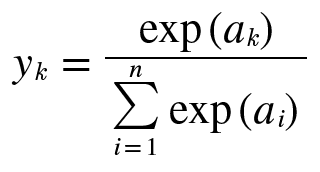
- n은 출력층의 뉴런 수, yk는 그중 k번째 출력임을 뜻한다. 
- 분자는 입력 신호 ak의 지수 함수, 분모는 모든 입력 신호의 지수 함수의 합으로 구성된다.

In [42]:
## 소프트맥스 함수 구현
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a) # 지수 함수
print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


In [43]:
sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

74.1221542101633


In [44]:
y = exp_a / sum_exp_a
print(y)

[0.01821127 0.24519181 0.73659691]


In [46]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

## 3.5.2 소프트맥스 함수 구현 시 주의점 
- 소프트맥스 함수는 지수 함수를 사용하는데, 지수 함수란 것이 쉽게 아주 큰 값을 내뱉어서 오버플로 문제가 발생한다.
- 이 문제를 해결하도록 소프트맥스 함수 구현을 개선한다. 다음은 개선한 수식이다.
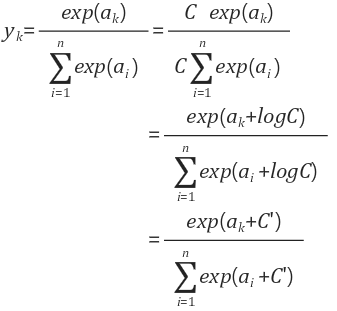

- 첫 번째 변형에서는 C라는 임의의 정수를 분자와 분모 양쪽에 곱한다. 
- 그 다음으로 C를 지수 함수 exp() 안으로 옮겨 logC로 만든다. 
- 마지막으로 C'라는 새로운 기호로 바꾼다.
- C'에 어떤 값을 대입해도 상관없지만, 오버플로를 막을 목적으로는 입력 신호 중 최댓값을 이용하는 것이 일반적이다.

In [49]:
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a))  # 소프트맥스 함수의 계산

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


array([nan, nan, nan])

In [50]:
c = np.max(a) # c = 1010 (최댓값)
a - c

array([  0, -10, -20])

In [51]:
np.exp(a - c) / np.sum(np.exp(a - c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

위를 바탕으로 소프트맥스 함수를 다시 구현하면 다음과 같다.

In [57]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) # 오버플로 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

## 3.5.3 소프트맥스 함수의 특징
softmax() 함수를 사용하면 신경망의 출력은 다음과 같이 계산할 수 있다.

In [58]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)

[0.01821127 0.24519181 0.73659691]


In [59]:
np.sum(y)

1.0

- 보는 바와 같이 소프트맥스 함수의 출력은 0에서 1.0 사이의 실수이다.
- 소프트맥스 함수 출력 총합은 1이다. 
- 주의점으로, 소프트맥스 함수를 적용해도 각 원소의 대소 관계는 변하지 않는다. 
- 신경망을 이용한 분류에서는 일반적으로 가장 큰 출력을 내는 뉴런에 해당하는 클래스로만 인식한다. 
- 따라서 현업에서도 지수 함수 계산에 드는 자원 낭비를 줄이고자 출력층의 소프트맥스 함수는 생략하는 것이 일반적이다. 

## 3.5.4. 출력층의 뉴런 수 정하기
- 출력층의 뉴런 수는 풀려는 문제에 맞게 적절히 정해야 한다. 
- 분류에서는 분류하고 싶은 클래스 수로 설정하는 것이 일반적이다.

# 3.6 손글씨 숫자 인식 

## 3.6.1 MNIST 데이터셋

In [61]:
from keras.datasets import mnist 

(x_train, t_train), (x_test, t_test) = mnist.load_data()

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


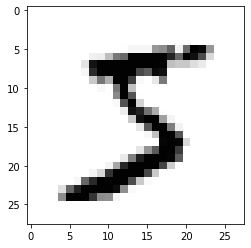

In [65]:
import matplotlib.pyplot as plt 
plt.imshow(x_train[0], cmap='Greys') 
plt.show()

## 3.6.2 신경망의 추론 처리
- 이 신경망은 입력층 뉴런을 784개, 출력층 뉴런을 10개로 구성한다.
- 입력층 뉴런이 784개인 이뉴는 이미지 크기가 28 * 28 = 784이기 때문이고, 출력층 뉴런이 10개인 이유는 이 문제가 0에서 9까지의 숫자를 구분하는 문제이기 때문이다.

In [68]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [81]:
def get_data():
    (x_train, t_train), (x_test, t_test) = mnist.load_data()
    return x_test, t_test

def init_network():
    with open('/content/drive/MyDrive/Deep-Learning-from-Scratch/sample_weight.pkl', 'rb') as f:
        network = pickle.load(f)

    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y


In [ ]:
import pickle

x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)

    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))